In [1]:
import sys
import os 
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

In [2]:
import torch
import numpy as np
import seaborn as sns
import pandas as pd
import torchattacks as ta
import matplotlib.pyplot as plt

from models import mnist, cifar
from data_attacks import alg1, alg2, alg3, attackAny, nothing
from load_data import load_mnist, load_mnist_inv, load_cifar
from utils import test_attack, att
from utils import vis_attack as vis
from utils import saveAttackResults as testSave
from utils import analyse

In [3]:
net1 = mnist.MNIST1()
net1.load_state_dict(torch.load('../models/mnist-net1.pt'))
net1.eval()

net2 = mnist.MNIST2()
net2.load_state_dict(torch.load('../models/mnist-net2.pt'))
net2.eval()

net3 = mnist.MNIST3()
net3.load_state_dict(torch.load('../models/mnist-net3.pt'))
net3.eval()

net4 = mnist.MNIST4()
net4.load_state_dict(torch.load('../models/mnist-net4.pt'))
net4.eval()

netInv1 = mnist.MNIST1()
netInv1.load_state_dict(torch.load('../models/mnistInv-net1.pt'))
netInv1.eval()

netInv2 = mnist.MNIST2()
netInv2.load_state_dict(torch.load('../models/mnistInv-net2.pt'))
netInv2.eval()

netInv3 = mnist.MNIST3()
netInv3.load_state_dict(torch.load('../models/mnistInv-net3.pt'))
netInv3.eval()

netInv4 = mnist.MNIST4()
netInv4.load_state_dict(torch.load('../models/mnistInv-net4.pt'))
netInv4.eval()

netCif1 = cifar.CIFAR1()
netCif1.load_state_dict(torch.load('../models/cifar-net1.pt'))
netCif1.eval()

netCif2 = cifar.CIFAR2()
netCif2.load_state_dict(torch.load('../models/cifar-net2.pt'))
netCif2.eval();

In [21]:
net=net2
n=1000
data = load_mnist.testSetCorrect(net,n)

imgs = np.load('../resultsNumpy/alg1Specific1000Net1_imgs.npy')
epss = np.load('../resultsNumpy/alg1Specific1000Net1_epss.npy')
analyse.table(data,epss)

\begin{array}{*{10}c}
0.0 & 0.0 & 0.17 & 0.05 & 0.0 & 0.38 & 0.14 & 0.11 & 0.0 & 0.15 \\
0.02 & 0.0 & 0.04 & 0.4 & 0.0 & 0.08 & 0.06 & 0.29 & 0.08 & 0.02 \\
0.03 & 0.03 & 0.0 & 0.51 & 0.0 & 0.02 & 0.09 & 0.09 & 0.22 & 0.01 \\
0.02 & 0.02 & 0.22 & 0.0 & 0.0 & 0.54 & 0.01 & 0.04 & 0.13 & 0.03 \\
0.03 & 0.0 & 0.05 & 0.01 & 0.0 & 0.0 & 0.04 & 0.15 & 0.09 & 0.64 \\
0.02 & 0.0 & 0.02 & 0.49 & 0.02 & 0.0 & 0.13 & 0.13 & 0.15 & 0.03 \\
0.04 & 0.01 & 0.2 & 0.01 & 0.02 & 0.52 & 0.0 & 0.07 & 0.01 & 0.12 \\
0.01 & 0.02 & 0.41 & 0.33 & 0.02 & 0.0 & 0.0 & 0.0 & 0.01 & 0.21 \\
0.02 & 0.01 & 0.32 & 0.37 & 0.01 & 0.09 & 0.02 & 0.08 & 0.0 & 0.07 \\
0.0 & 0.01 & 0.02 & 0.1 & 0.23 & 0.1 & 0.0 & 0.41 & 0.14 & 0.0 \\
\end{array}


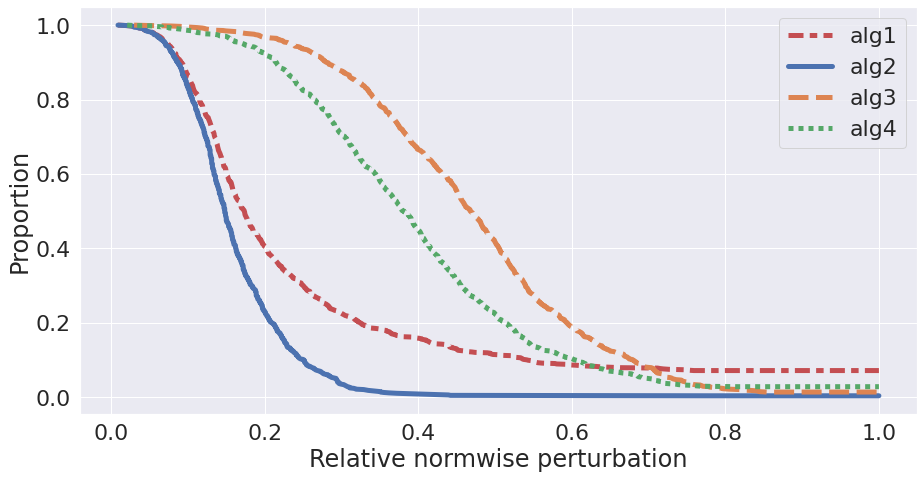

In [8]:
names = ['alg2Specific100', 'alg3Specific100', 'alg4Specific100','alg1Specific100']
epssLists = np.array([analyse.specificToAny(np.load('../resultsNumpy/{}_epss.npy'.format(name))) for name in names])
order = ['alg2','alg3','alg4','alg1']
analyse.comparePerformance(epssLists, order,'PerformanceComparison1',styleOrder=order,palOrder=[3,0,1,2])

[[ 1.        -0.3301755]
 [-0.3301755  1.       ]]


/home/s2229207/Documents/Study/ExtendedProject/Code/Componentwise-BE-for-NN-py/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


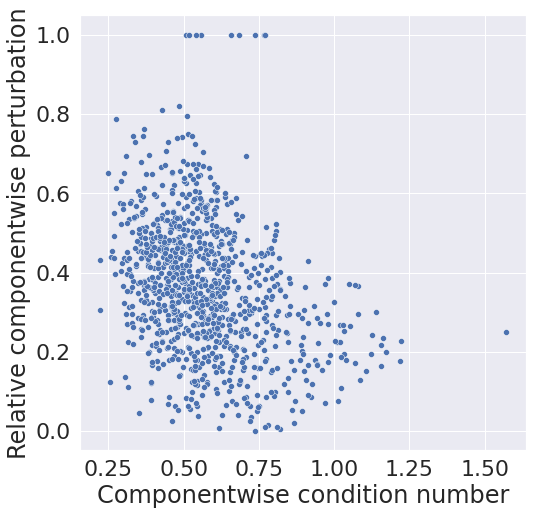

In [7]:
net=net2
n=1000
data = load_mnist.testSetCorrect(net,n)
i=3
imgs = np.load('../resultsNumpy/alg{}Specific1000Net1_imgs.npy'.format(i))
epss = np.load('../resultsNumpy/alg{}Specific1000Net1_epss.npy'.format(i))
analyse.conditionNumberComponentwise(net,data,epss,imgs,'conditionNumbersAlg3',type=1)

(341, 10)
(651, 10)
(341, 10, 28, 28)
(659, 10, 28, 28)
(1000, 10, 28, 28)
(992, 10)
[[ 1.         -0.34263217]
 [-0.34263217  1.        ]]


/home/s2229207/Documents/Study/ExtendedProject/Code/Componentwise-BE-for-NN-py/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


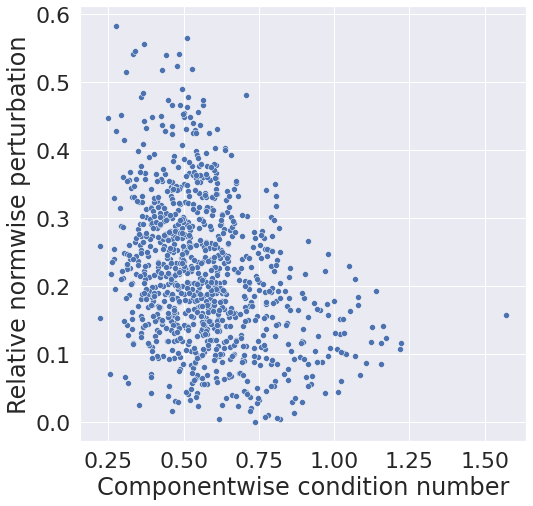

In [5]:
net=net2
n=992
data = load_mnist.testSetCorrect(net,n)
b1 = np.load('../resultsNumpy/alg4Specific1000Net1_imgs.npy')
b2 = np.load('../resultsNumpy/alg4Specific1000Net1-part2_imgs.npy')
a1 = np.load('../resultsNumpy/alg4Specific1000Net1_epss.npy')
a2 = np.load('../resultsNumpy/alg4Specific1000Net1-part2_epss.npy')

for i in range(1000):
    if np.array_equiv(a1[-1,:], np.zeros((1,10))):
        a1 = a1[:-1,:]
        b1 = b1[:-1,:]

for i in range(1000):
    if np.array_equiv(a2[-1,:], np.zeros((1,10))):
        a2 = a2[:-1,:]

epss = np.concatenate((a1,a2))
imgs = np.concatenate((b1,b2))
print(a1.shape)
print(a2.shape)
print(b1.shape)
print(b2.shape)
print(imgs.shape)
print(epss.shape)
analyse.conditionNumberComponentwise(net,data,epss,imgs,'conditionNumbersAlg4',type=2)

[[ 1.         -0.52381561]
 [-0.52381561  1.        ]]


/home/s2229207/Documents/Study/ExtendedProject/Code/Componentwise-BE-for-NN-py/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


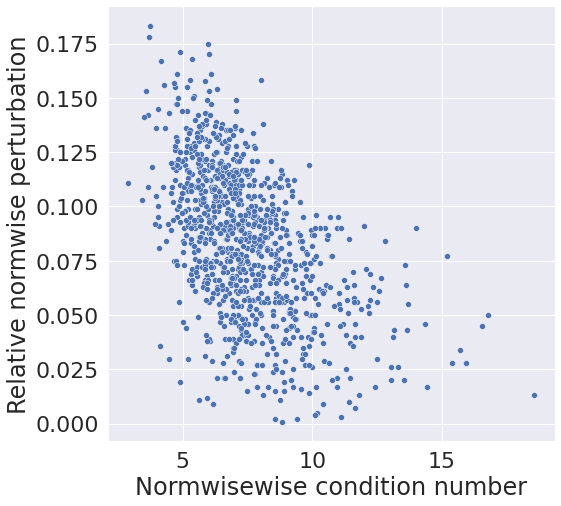

In [6]:
net=net2
n=1000
data = load_mnist.testSetCorrect(net,n)
i=2
imgs = np.load('../resultsNumpy/alg{}Specific1000Net1_imgs.npy'.format(i))
epss = np.load('../resultsNumpy/alg{}Specific1000Net1_epss.npy'.format(i))
analyse.conditionNumberNormwise(net,data,epss,imgs,'conditionNumbersAlg2')

In [9]:
a = np.load('../resultsNumpy/alg4Specific1000Net1-part2_epss.npy')
print(a.shape)
for i in range(1000):
    if np.array_equiv(a[-1,:], np.zeros((1,10))):
        a = a[:-1,:]
a.shape

(1000, 10)


(651, 10)

In [5]:
net = net2
n = 100
alg = alg2.Al1()
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg2Specific100Net1')

In [ ]:
net = net2
n = 1000
alg = alg2.Al1()
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg2Specific1000Net1')

In [5]:
net = net2
n = 1000
alg = alg3.Al1()
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg3Specific1000Net1')

/home/s2229207/Documents/Study/ExtendedProject/Code/Componentwise-BE-for-NN-py/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


KeyboardInterrupt: 

In [6]:
net = net2
n = 1000
alg = alg3.Al1(type=2)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg4Specific1000Net1')

KeyboardInterrupt: 

In [8]:
net = net2
n = 100
alg = alg2.Al0()
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg2Specific100Net1Analytic')

In [6]:
net = net2
n = 100
alg = alg3.Al1()
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg3Specific100Net1')

/home/s2229207/Documents/Study/ExtendedProject/Code/Componentwise-BE-for-NN-py/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [7]:
net = net2
n = 100
alg = alg3.Al1(type=2)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg4Specific100Net1')

In [9]:
net = net2
n = 100
alg = alg3.Al0(type=2)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg4Specific100Net1Analytic')

In [8]:
net = net3
n = 100
alg = alg2.Al1()
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg2Specific100Net2')

In [9]:
net = net4
n = 100
alg = alg2.Al1()
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg2Specific100Net3')

In [10]:
net = net4
n = 100
alg = alg2.Al0()
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg2Specific100Net3Analytic')

In [10]:
net = net3
n = 100
alg = alg3.Al1(type=2)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg4Specific100Net2')

In [11]:
net = net4
n = 100
alg = alg3.Al1(type=2)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg4Specific100Net3')

In [11]:
net = net4
n = 100
alg = alg3.Al0(type=2)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg4Specific100Net3Analytic')

In [5]:
net = net2
n = 100
alg = alg2.Al0(num=True)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg2Specific100Net1Numerical')

In [4]:
net = net2
n = 100
alg = alg3.Al0(type=2,num=True)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg4Specific100Net1Numerical')

In [5]:
net = net4
n = 100
alg = alg2.Al0(num=True)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg2Specific100Net3Numerical')

In [4]:
net = net4
n = 100
alg = alg3.Al0(type=2,num=True)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg4Specific100Net3Numerical')

In [5]:
net = net2
n = 100
alg = nothing.Al()
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'original100')

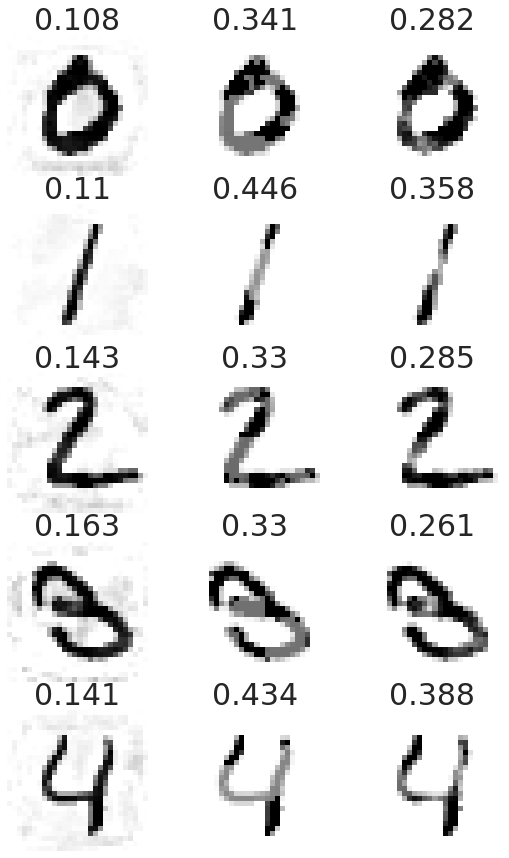

In [11]:
names = ['alg2Specific100Net1', 'alg3Specific100Net1', 'alg4Specific100Net1']
imglists = np.array([np.load('../resultsNumpy/{}_imgs.npy'.format(name)) for name in names])
epssLists = np.array([np.load('../resultsNumpy/{}_epss.npy'.format(name)) for name in names])
analyse.compareImages(imglists, epssLists, [0,1,2,3,4], [3,2,1,17,4],[9,2,1,7,5],'ImageComparison1.1NEW')

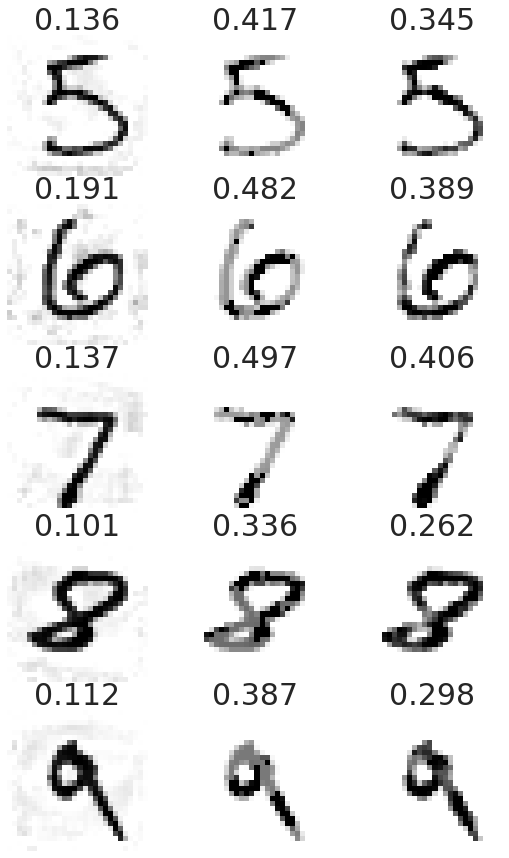

In [10]:
names = ['alg2Specific100Net1', 'alg3Specific100Net1', 'alg4Specific100Net1']
imglists = np.array([np.load('../resultsNumpy/{}_imgs.npy'.format(name)) for name in names])
epssLists = np.array([np.load('../resultsNumpy/{}_epss.npy'.format(name)) for name in names])
analyse.compareImages(imglists, epssLists, [5,6,7,8,9], [14,10,0,60,7],[9,1,5,7,3],'ImageComparison1.2NEW')

KeyboardInterrupt: 

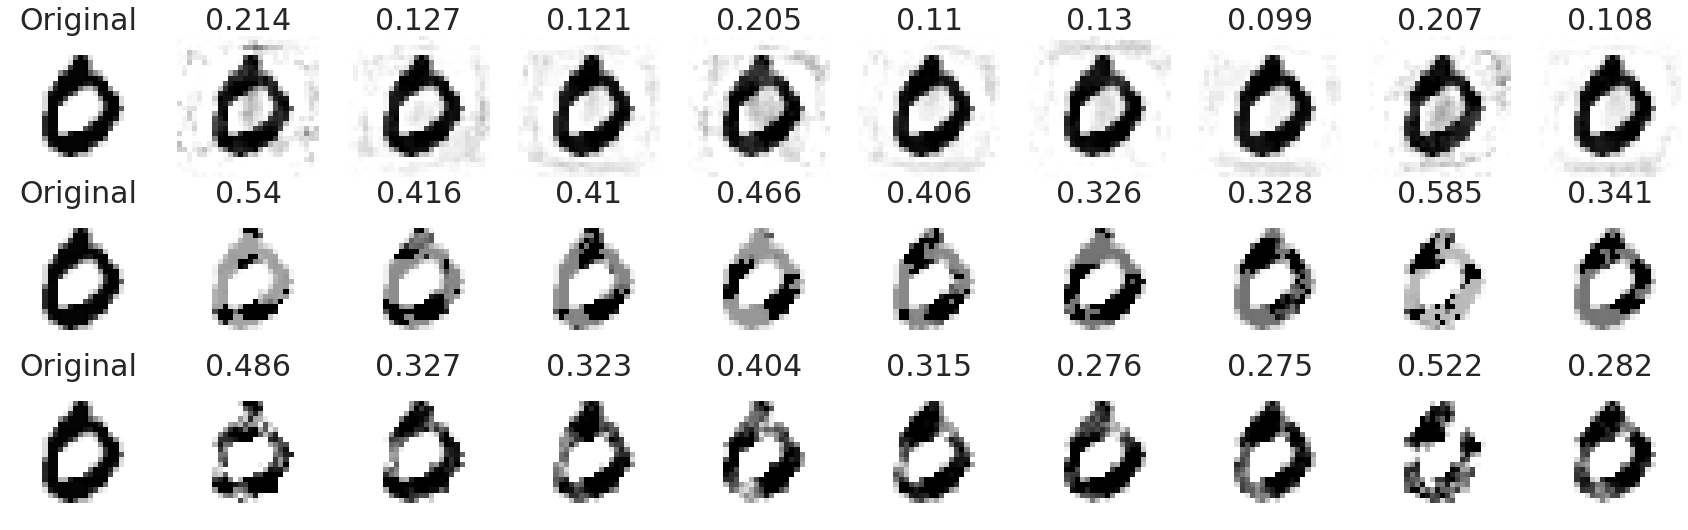

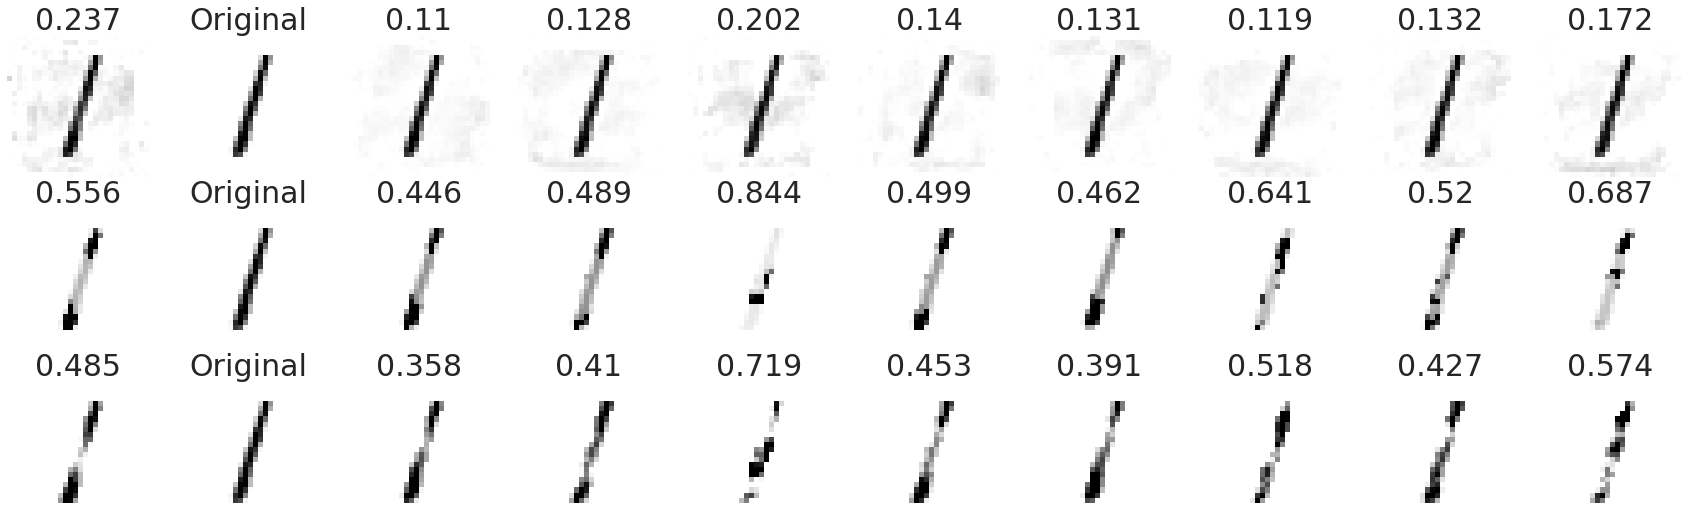

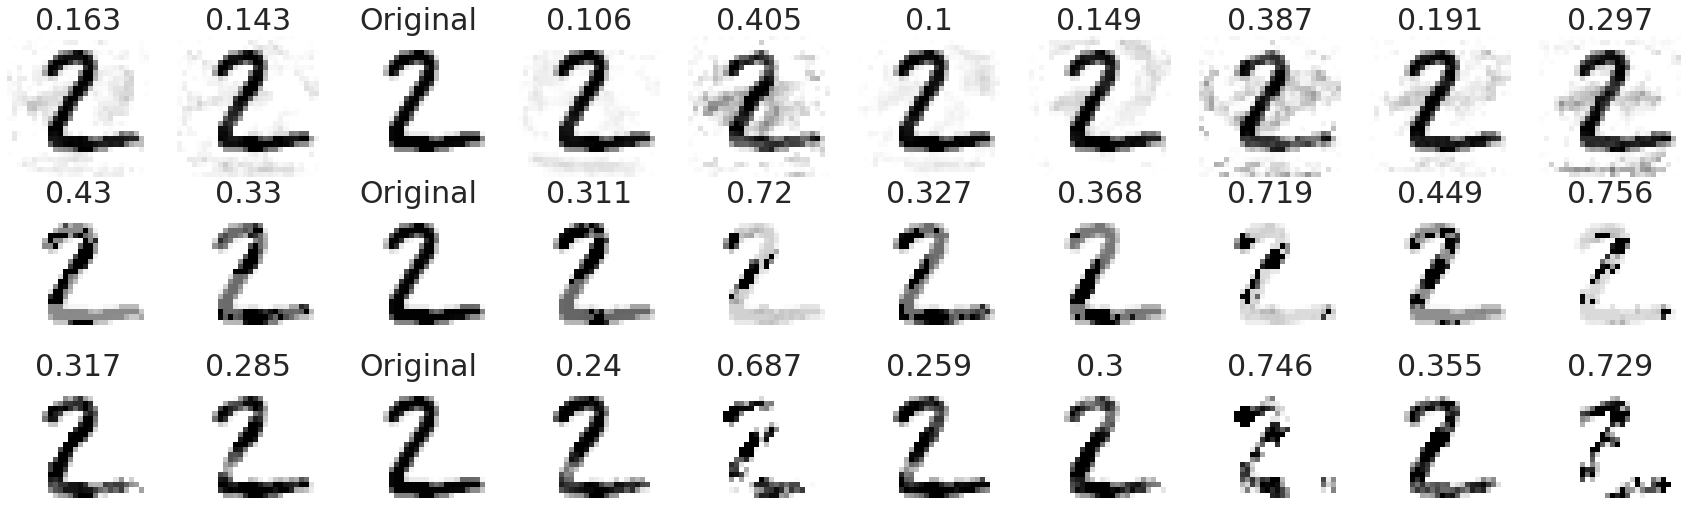

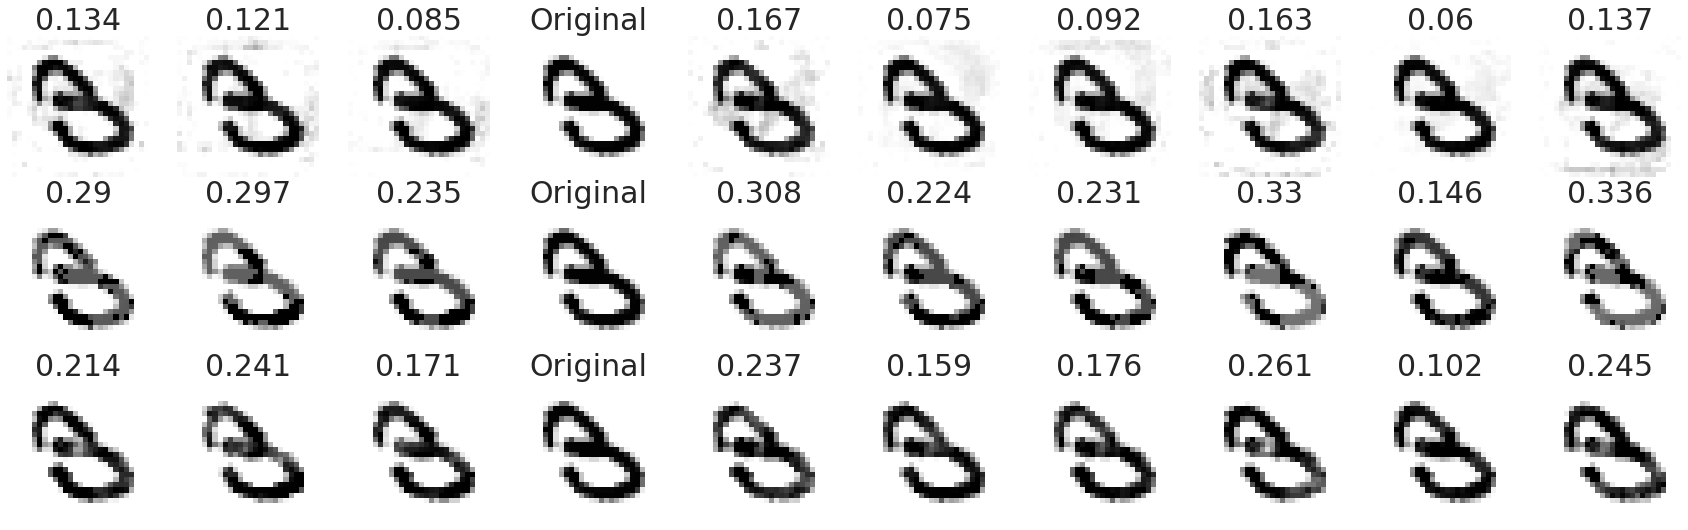

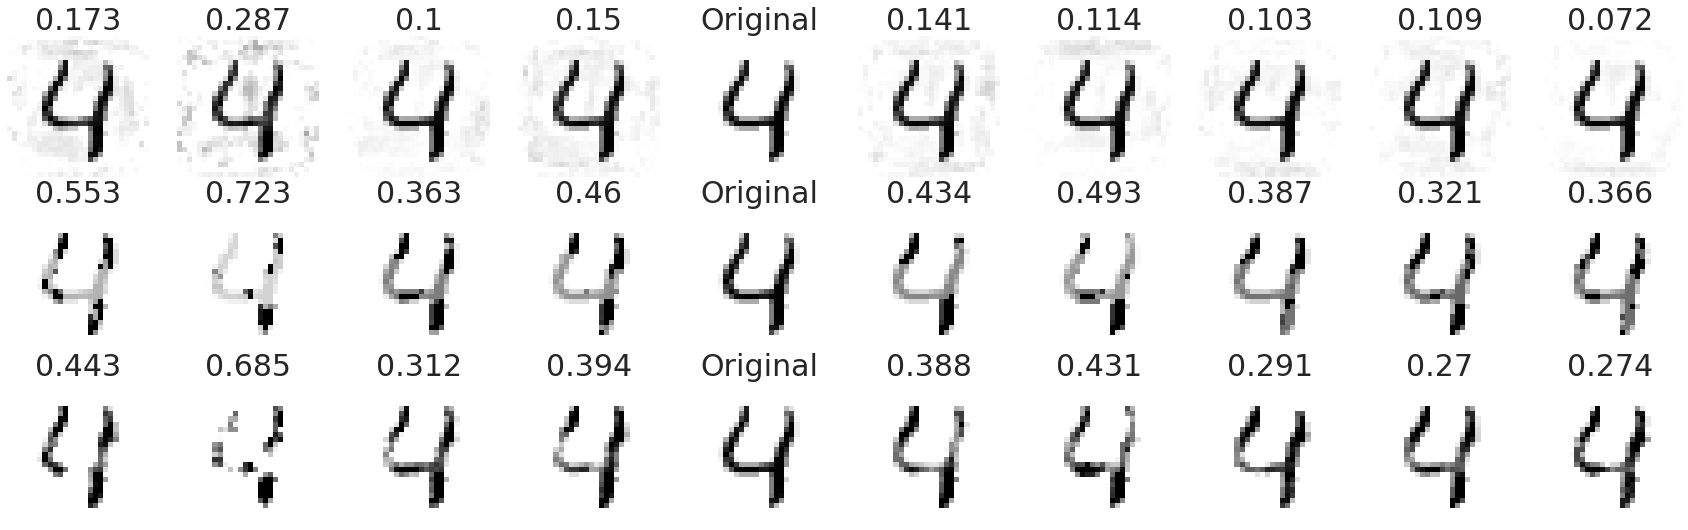

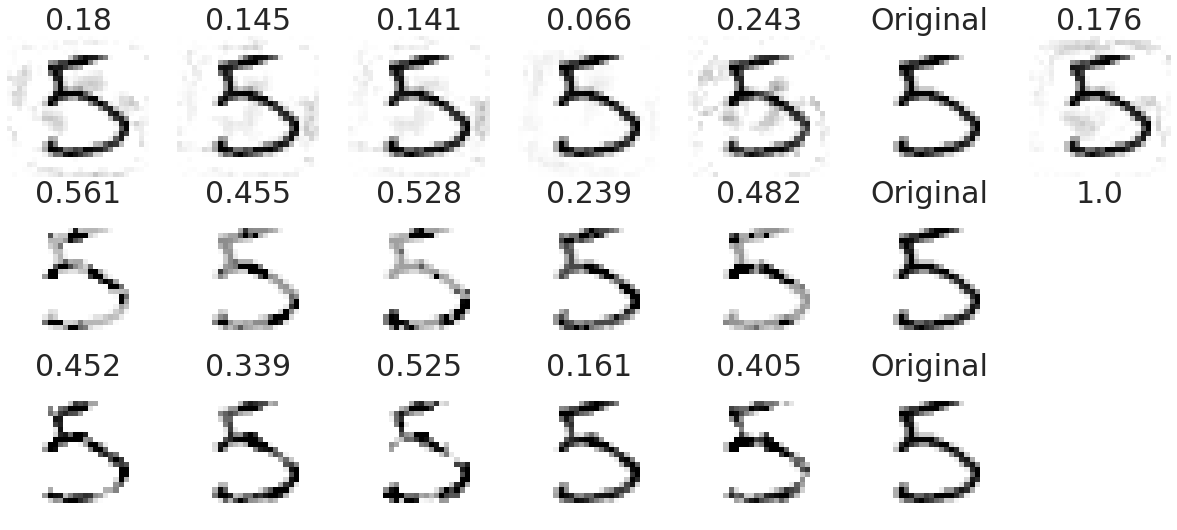

In [5]:
names = ['alg2Specific100Net1', 'alg3Specific100Net1', 'alg4Specific100Net1']
imglists = np.array([np.load('../resultsNumpy/{}_imgs.npy'.format(name)) for name in names])
epssLists = np.array([np.load('../resultsNumpy/{}_epss.npy'.format(name)) for name in names])

indices = [3,2,1,17,4,14,10,0,60,7]
originals = np.load('../resultsNumpy/original100_imgs.npy')
for i in range(10):
    analyse.fullComparisonImages(originals,imglists, epssLists, indices[i], i, 'ImageComparisonFull{}'.format(i))

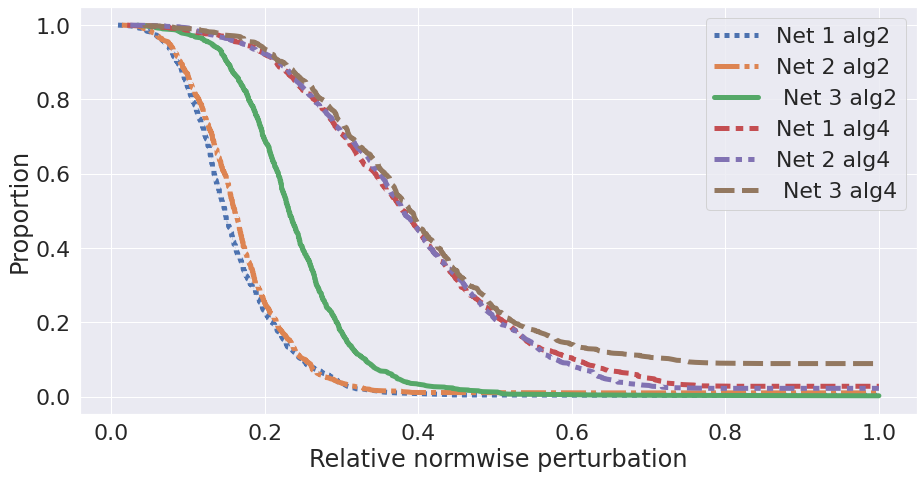

In [6]:
names = ['alg2Specific100Net1','alg2Specific100Net2','alg2Specific100Net3','alg4Specific100Net1','alg4Specific100Net2','alg4Specific100Net3']
epssLists = np.array([analyse.specificToAny(np.load('../resultsNumpy/{}_epss.npy'.format(name))) for name in names])
analyse.comparePerformance(epssLists, ['Net 1 alg2','Net 2 alg2',' Net 3 alg2','Net 1 alg4','Net 2 alg4',' Net 3 alg4'],'PerformanceComparison2',legendOrder=['Net 1 alg2','Net 2 alg2',' Net 3 alg2','Net 1 alg4','Net 2 alg4',' Net 3 alg4'])

In [4]:
net = net2
n = 100
alg = ta.PGDL2(net, eps=0.1, alpha=0.1, steps=4)
data = load_mnist.testSetCorrect(net,n)

testSave.any(net,data,att.Att(alg),'PGDBest100Net1')

In [5]:
net = net2
n = 100
alg = ta.DeepFool(net, steps=10)
data = load_mnist.testSetCorrect(net,n)

testSave.any(net,data,att.Att(alg),'DeepFoolBest100Net1')

In [10]:
np.save('../resultsNumpy/alg2Best100Net1_epss.npy',analyse.specificToBest(np.load('../resultsNumpy/alg2Specific100Net1_epss.npy')))
np.save('../resultsNumpy/alg4Best100Net1_epss.npy',analyse.specificToBest(np.load('../resultsNumpy/alg4Specific100Net1_epss.npy')))

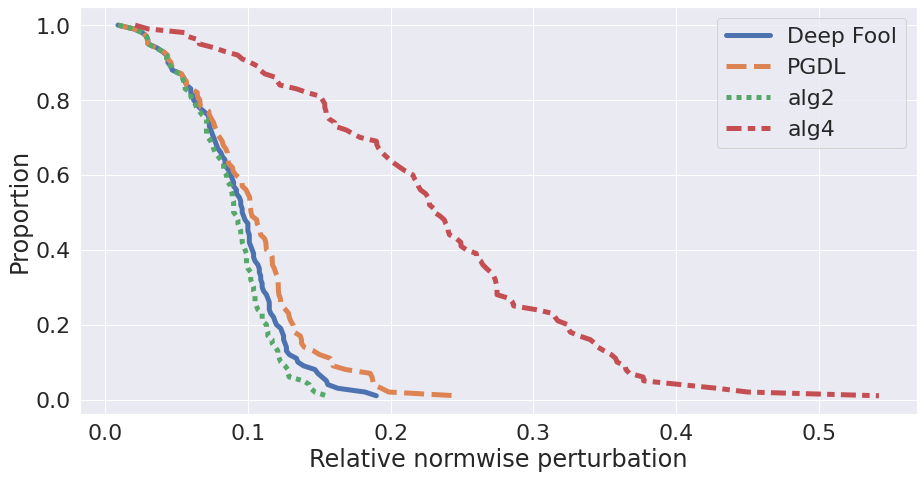

In [7]:
names = ['alg2Best100Net1','alg4Best100Net1','PGDBest100Net1','DeepFoolBest100Net1']
epssLists = np.array([np.load('../resultsNumpy/{}_epss.npy'.format(name)) for name in names])
analyse.comparePerformance(epssLists, ['alg2','alg4','PGDL','Deep Fool'],'PerformanceComparison3')

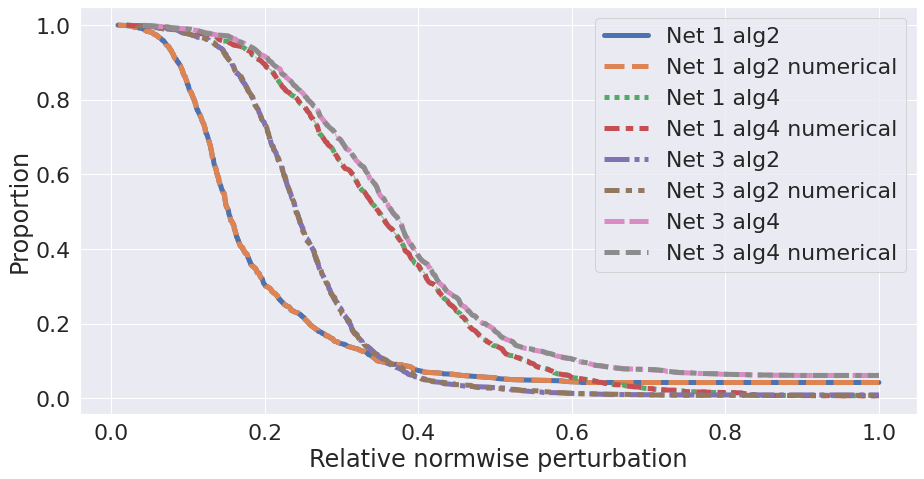

In [8]:
names = ['alg2Specific100Net1Analytic','alg2Specific100Net1Numerical','alg4Specific100Net1Analytic','alg4Specific100Net1Numerical','alg2Specific100Net3Analytic','alg2Specific100Net3Numerical','alg4Specific100Net3Analytic','alg4Specific100Net3Numerical']
epssLists = np.array([analyse.specificToAny(np.load('../resultsNumpy/{}_epss.npy'.format(name))) for name in names])
analyse.comparePerformance(epssLists, ['Net 1 alg2','Net 1 alg2 numerical','Net 1 alg4','Net 1 alg4 numerical','Net 3 alg2', 'Net 3 alg2 numerical', 'Net 3 alg4', 'Net 3 alg4 numerical'],'PerformanceComparison4',legendOrder=['Net 1 alg2','Net 1 alg2 numerical','Net 1 alg4','Net 1 alg4 numerical','Net 3 alg2', 'Net 3 alg2 numerical', 'Net 3 alg4', 'Net 3 alg4 numerical'])